# Prediction using Supervised Learning
#  Submitted by - Aarti Garkoti

# Importing relevant libraries

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Importing the data from link.

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Now, to identify the relationship between the data, we plot a 2-D graph

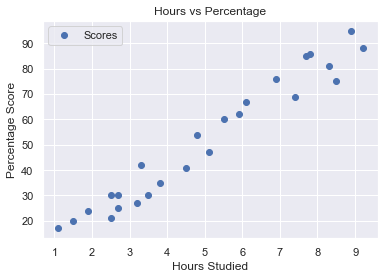

In [23]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Here, we can see that there is a positive relation between the two variables. More the number of hours spent by the student in studying, higher the marks scored.

# Preparing the data

Now we divide the data into 'attributes'(inputs) and 'labels'(outputs). we use iloc to assign values to x and y

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, we will now split this data into training and test sets. We'll do this by using the train-test-split method:

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the algorithm

In [11]:
# After having split the data into training anf testing sets, we will now train the data.

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression()

In [26]:
#to find best values of intercept and slope, we use the following code:

In [27]:
print(regressor.intercept_)

2.018160041434662


In [28]:
print(regressor.coef_)

[9.91065648]


In [13]:
# Plotting the regression line for test data:

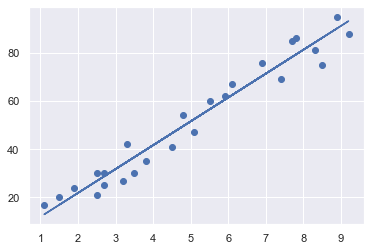

In [14]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Since the results of training algorithm are good, we now make predictions: 

In [15]:
# Testing data in hours and predicting the scores:

In [16]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
#Comparing actual vs predicted

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Now we will test the predicted score if a student studies for 9.5 hours:

In [29]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [33]:
# If the student studies for 9.25 hours, as per our model, the score will be of 93.69% . 

# Evaluating the model

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared: 4.647447612100373


In [34]:
# These values indicate that our model worked nicely!